# Privacy Engineering Coursework

In [38]:
import hashlib
import pandas as pd
import numpy as np

In [39]:
#Data Loading
# from google.colab import drive
# drive.mount('/content/drive')
# source_data = pd.read_csv("/content/drive/MyDrive/coursework_dataset.csv")
source_data = pd.read_csv("./coursework_dataset.csv")

In [40]:
source_data.head(5)

,area,postcode,age,dob,gender,name,marital_status,qualifications,occupation,num_children,income,on_benefits,home_ownership,credit_score
0,Nottingham,NG9 5SS,35,11/10/1988,Female,Aimee Hilton,married,Level 3 (High school),No occupation,0,106,1,0,406
1,Rushmoor,GU14 1NU,64,13/2/1959,Male,Tom James,married,Apprenticeship,"8. Process, plant and machine operatives",4,47506,0,0,443
2,Redditch,B97 9DO,47,16/3/1976,Male,Wayne Collins,married,Level 4 (BA+) or above,"6. Caring, leisure and other service occupations",1,48611,0,1,952
3,Staffordshire Moorlands,ST15 1UQ,80,26/9/1943,Male,Cameron Roberts,never_married,Level 4 (BA+) or above,9. Elementary occupations,0,45199,0,1,810
4,Barking and Dagenham,RM10 3DJ,35,14/6/1988,Male,Thomas Campbell,married,Level 1 (School),No occupation,0,10771,1,0,171


## Data Pseudonymization

In [41]:
#removing age
salt = "\ldfbOQ3CUasdsla';flsafk0q31032U0[1XRP]eqr3"
source_data['pname'] = (source_data['name'] + source_data['postcode'] + salt).apply(lambda x: hashlib.sha3_256(x.encode()).hexdigest())
data = source_data.drop('name', axis=1)
data = data.set_index('pname')
data.head(5)

,area,postcode,age,dob,gender,marital_status,qualifications,occupation,num_children,income,on_benefits,home_ownership,credit_score
pname,,,,,,,,,,,,,
3c74a97ca3c31e1638c98d00db4a263fd18fb58a2a5de056e47bf09a2b98a1d5,Nottingham,NG9 5SS,35,11/10/1988,Female,married,Level 3 (High school),No occupation,0,106,1,0,406
150db586bb6a999b3046a8c3cb14160757db6f0395b75566a09c32c44217a287,Rushmoor,GU14 1NU,64,13/2/1959,Male,married,Apprenticeship,"8. Process, plant and machine operatives",4,47506,0,0,443
08ed1e74a9d71f48f5c882b1ef37dd86a2ba9842be5399ec4c609ed75d49d61e,Redditch,B97 9DO,47,16/3/1976,Male,married,Level 4 (BA+) or above,"6. Caring, leisure and other service occupations",1,48611,0,1,952
7cf76f089dd98978e58522a7e4da1ddd93675923ceff9deb1f4f7c74836e9912,Staffordshire Moorlands,ST15 1UQ,80,26/9/1943,Male,never_married,Level 4 (BA+) or above,9. Elementary occupations,0,45199,0,1,810
55e84f01932f4cbf5dae2d63597c48ad10c94ad82aeed5a3c4fa8fd3f6499c8c,Barking and Dagenham,RM10 3DJ,35,14/6/1988,Male,married,Level 1 (School),No occupation,0,10771,1,0,171


## De-Indentification Strategies

### K-Anonymity


In [42]:
import matplotlib.pyplot as plt

def plot_histogram(nb, num_class):
    # plot a histogram up to 10 equivalence class
    plt.figure(figsize=(15,10))
    a = plt.hist(nb, bins=np.arange(1, num_class+2, 1), align='left', width=.9)

    plt.xlabel("Size of Equivalence Classes") # with nice axis and title!
    plt.ylabel("Number of Equivalence Classes")
    # plt.title(f"Number of Equivalence Classes (up to {num_class}) by Size of Equivalence Classes")
    plt.xticks(range(1, num_class+1), fontsize=15); # for ticks on the x axis to go from 1 to max
    plt.yticks(fontsize=15)
    return a

def size_equivalence_classes(dataset):
  '''Returns the list of sizes of the equivalence classes in the dataset.'''
  print(dataset.columns[:-4])
  grouped = dataset.groupby(list(dataset.columns[:-4])) # all the columns except last 5
  return [len(g[1]) for g in grouped]

Drop DOB, Postcode and Name

In [43]:
def suppress_columns(dataset):
    data = dataset.copy()
    data = data.drop(columns=['dob', 'postcode'])
    return data

data_suppressed = suppress_columns(data)

Generalise Area

In [44]:
def generalise_area(dataset):
    area_map = {
      "Adur": "South East",
      "Allerdale": "North West",
      "Amber Valley": "East Midlands",
      "Arun": "South East",
      "Ashfield": "East Midlands",
      "Ashford": "South East",
      "Babergh": "East of England",
      "Barking and Dagenham": "London",
      "Barnet": "London",
      "Barnsley": "Yorkshire and the Humber",
      "Barrow-in-Furness": "North West",
      "Basildon": "East of England",
      "Basingstoke and Deane": "South East",
      "Bassetlaw": "East Midlands",
      "Bath and North East Somerset": "South West",
      "Bedford": "East of England",
      "Bexley": "London",
      "Birmingham": "West Midlands",
      "Blaby": "East Midlands",
      "Blackburn with Darwen": "North West",
      "Blackpool": "North West",
      "Blaenau Gwent": "Wales",
      "Bolsover": "East Midlands",
      "Bolton": "North West",
      "Boston": "East Midlands",
      "Bracknell Forest": "South East",
      "Bradford": "Yorkshire and the Humber",
      "Braintree": "East of England",
      "Breckland": "East of England",
      "Brent": "London",
      "Brentwood": "East of England",
      "Bridgend": "Wales",
      "Brighton and Hove": "South East",
      "Broadland": "East of England",
      "Bromley": "London",
      "Bromsgrove": "West Midlands",
      "Broxbourne": "East of England",
      "Broxtowe": "East Midlands",
      "Burnley": "North West",
      "Bury": "North West",
      "Caerphilly": "Wales",
      "Calderdale": "Yorkshire and the Humber",
      "Cambridge": "East of England",
      "Camden": "London",
      "Cannock Chase": "West Midlands",
      "Canterbury": "South East",
      "Cardiff": "Wales",
      "Carlisle": "North West",
      "Carmarthenshire": "Wales",
      "Castle Point": "East of England",
      "Central Bedfordshire": "East of England",
      "Ceredigion": "Wales",
      "Charnwood": "East Midlands",
      "Chelmsford": "East of England",
      "Cheltenham": "South West",
      "Cherwell": "South East",
      "Cheshire East": "North West",
      "Cheshire West and Chester": "North West",
      "Chesterfield": "East Midlands",
      "Chichester": "South East",
      "Chorley": "North West",
      "City of London": "London",
      "Colchester": "East of England",
      "Conwy": "Wales",
      "Copeland": "North West",
      "Cornwall": "South West",
      "Cotswold": "South West",
      "County Durham": "North East",
      "Coventry": "West Midlands",
      "Craven": "Yorkshire and the Humber",
      "Crawley": "South East",
      "Croydon": "London",
      "Dacorum": "East of England",
      "Darlington": "North East",
      "Dartford": "South East",
      "Denbighshire": "Wales",
      "Derby": "East Midlands",
      "Derbyshire Dales": "East Midlands",
      "Doncaster": "Yorkshire and the Humber",
      "Dover": "South East",
      "Dudley": "West Midlands",
      "Ealing": "London",
      "East Cambridgeshire": "East of England",
      "East Devon": "South West",
      "East Hampshire": "South East",
      "East Hertfordshire": "East of England",
      "East Lindsey": "East Midlands",
      "East Riding of Yorkshire": "Yorkshire and the Humber",
      "East Staffordshire": "West Midlands",
      "Eastbourne": "South East",
      "Eastleigh": "South East",
      "Eden": "North West",
      "Elmbridge": "South East",
      "Enfield": "London",
      "Epping Forest": "East of England",
      "Epsom and Ewell": "South East",
      "Erewash": "East Midlands",
      "Exeter": "South West",
      "Fareham": "South East",
      "Fenland": "East of England",
      "Flintshire": "Wales",
      "Forest of Dean": "South West",
      "Fylde": "North West",
      "Gateshead": "North East",
      "Gedling": "East Midlands",
      "Gloucester": "South West",
      "Gosport": "South East",
      "Gravesham": "South East",
      "Great Yarmouth": "East of England",
      "Greenwich": "London",
      "Guildford": "South East",
      "Gwynedd": "Wales",
      "Hackney": "London",
      "Halton": "North West",
      "Hambleton": "Yorkshire and the Humber",
      "Hammersmith and Fulham": "London",
      "Harborough": "East Midlands",
      "Haringey": "London",
      "Harlow": "East of England",
      "Harrogate": "Yorkshire and the Humber",
      "Harrow": "London",
      "Hart": "South East",
      "Hartlepool": "North East",
      "Hastings": "South East",
      "Havant": "South East",
      "Havering": "London",
      "Hertsmere": "East of England",
      "High Peak": "East Midlands",
      "Hillingdon": "London",
      "Hinckley and Bosworth": "East Midlands",
      "Horsham": "South East",
      "Hounslow": "London",
      "Huntingdonshire": "East of England",
      "Hyndburn": "North West",
      "Ipswich": "East of England",
      "Isle of Anglesey": "Wales",
      "Isle of Wight": "South East",
      "Isles of Scilly": "South West",
      "Islington": "London",
      "Kensington and Chelsea": "London",
      "King's Lynn and West Norfolk": "East of England",
      "Kingston upon Thames": "London",
      "Kirklees": "Yorkshire and the Humber",
      "Knowsley": "North West",
      "Lambeth": "London",
      "Lancaster": "North West",
      "Leeds": "Yorkshire and the Humber",
      "Leicester": "East Midlands",
      "Lewes": "South East",
      "Lewisham": "London",
      "Lichfield": "West Midlands",
      "Lincoln": "East Midlands",
      "Liverpool": "North West",
      "Luton": "East of England",
      "Maidstone": "South East",
      "Maldon": "East of England",
      "Malvern Hills": "West Midlands",
      "Manchester": "North West",
      "Mansfield": "East Midlands",
      "Medway": "South East",
      "Melton": "East Midlands",
      "Mendip": "South West",
      "Merthyr Tydfil": "Wales",
      "Merton": "London",
      "Mid Devon": "South West",
      "Mid Suffolk": "East of England",
      "Mid Sussex": "South East",
      "Middlesbrough": "North East",
      "Milton Keynes": "South East",
      "Mole Valley": "South East",
      "Monmouthshire": "Wales",
      "Neath Port Talbot": "Wales",
      "New Forest": "South East",
      "Newark and Sherwood": "East Midlands",
      "Newcastle upon Tyne": "North East",
      "Newcastle-under-Lyme": "West Midlands",
      "Newham": "London",
      "Newport": "Wales",
      "North Devon": "South West",
      "North East Derbyshire": "East Midlands",
      "North East Lincolnshire": "Yorkshire and the Humber",
      "North Hertfordshire": "East of England",
      "North Kesteven": "East Midlands",
      "North Lincolnshire": "Yorkshire and the Humber",
      "North Norfolk": "East of England",
      "North Somerset": "South West",
      "North Tyneside": "North East",
      "North Warwickshire": "West Midlands",
      "North West Leicestershire": "East Midlands",
      "Northumberland": "North East",
      "Norwich": "East of England",
      "Nottingham": "East Midlands",
      "Nuneaton and Bedworth": "West Midlands",
      "Oadby and Wigston": "East Midlands",
      "Oldham": "North West",
      "Oxford": "South East",
      "Pembrokeshire": "Wales",
      "Pendle": "North West",
      "Peterborough": "East of England",
      "Plymouth": "South West",
      "Portsmouth": "South East",
      "Powys": "Wales",
      "Preston": "North West",
      "Reading": "South East",
      "Redbridge": "London",
      "Redcar and Cleveland": "North East",
      "Redditch": "West Midlands",
      "Reigate and Banstead": "South East",
      "Rhondda Cynon Taf": "Wales",
      "Ribble Valley": "North West",
      "Richmond upon Thames": "London",
      "Richmondshire": "Yorkshire and the Humber",
      "Rochdale": "North West",
      "Rochford": "East of England",
      "Rossendale": "North West",
      "Rother": "South East",
      "Rotherham": "Yorkshire and the Humber",
      "Rugby": "West Midlands",
      "Runnymede": "South East",
      "Rushcliffe": "East Midlands",
      "Rushmoor": "South East",
      "Rutland": "East Midlands",
      "Ryedale": "Yorkshire and the Humber",
      "Salford": "North West",
      "Sandwell": "West Midlands",
      "Scarborough": "Yorkshire and the Humber",
      "Sedgemoor": "South West",
      "Sefton": "North West",
      "Selby": "Yorkshire and the Humber",
      "Sevenoaks": "South East",
      "Sheffield": "Yorkshire and the Humber",
      "Shropshire": "West Midlands",
      "Slough": "South East",
      "Solihull": "West Midlands",
      "South Cambridgeshire": "East of England",
      "South Derbyshire": "East Midlands",
      "South Gloucestershire": "South West",
      "South Hams": "South West",
      "South Holland": "East Midlands",
      "South Kesteven": "East Midlands",
      "South Lakeland": "North West",
      "South Norfolk": "East of England",
      "South Oxfordshire": "South East",
      "South Ribble": "North West",
      "South Somerset": "South West",
      "South Staffordshire": "West Midlands",
      "South Tyneside": "North East",
      "Southampton": "South East",
      "Southend-on-Sea": "East of England",
      "Southwark": "London",
      "Spelthorne": "South East",
      "St Albans": "East of England",
      "St. Helens": "North West",
      "Stafford": "West Midlands",
      "Staffordshire Moorlands": "West Midlands",
      "Stevenage": "East of England",
      "Stockport": "North West",
      "Stockton-on-Tees": "North East",
      "Stoke-on-Trent": "West Midlands",
      "Stratford-on-Avon": "West Midlands",
      "Stroud": "South West",
      "Sunderland": "North East",
      "Surrey Heath": "South East",
      "Sutton": "London",
      "Swale": "South East",
      "Swansea": "Wales",
      "Swindon": "South West",
      "Tameside": "North West",
      "Tamworth": "West Midlands",
      "Tandridge": "South East",
      "Teignbridge": "South West",
      "Telford and Wrekin": "West Midlands",
      "Tendring": "East of England",
      "Test Valley": "South East",
      "Tewkesbury": "South West",
      "Thanet": "South East",
      "Three Rivers": "East of England",
      "Thurrock": "East of England",
      "Tonbridge and Malling": "South East",
      "Torbay": "South West",
      "Torfaen": "Wales",
      "Torridge": "South West",
      "Tower Hamlets": "London",
      "Trafford": "North West",
      "Tunbridge Wells": "South East",
      "Uttlesford": "East of England",
      "Vale of White Horse": "South East",
      "Wakefield": "Yorkshire and the Humber",
      "Walsall": "West Midlands",
      "Waltham Forest": "London",
      "Wandsworth": "London",
      "Warrington": "North West",
      "Warwick": "West Midlands",
      "Watford": "East of England",
      "Waverley": "South East",
      "Wealden": "South East",
      "Welwyn Hatfield": "East of England",
      "West Berkshire": "South East",
      "West Devon": "South West",
      "West Lancashire": "North West",
      "West Lindsey": "East Midlands",
      "West Oxfordshire": "South East",
      "Westminster": "London",
      "Wigan": "North West",
      "Wiltshire": "South West",
      "Winchester": "South East",
      "Windsor and Maidenhead": "South East",
      "Wirral": "North West",
      "Woking": "South East",
      "Wokingham": "South East",
      "Wolverhampton": "West Midlands",
      "Worcester": "West Midlands",
      "Worthing": "South East",
      "Wrexham": "Wales",
      "Wychavon": "West Midlands",
      "Wyre": "North West",
      "Wyre Forest": "West Midlands",
      "York": "Yorkshire and the Humber",
    }

    data = dataset.copy()
    data["area"] = data["area"].apply(lambda x: area_map[x] if x in area_map else x)
    return data

data_area_generalised = generalise_area(data_suppressed)

Index(['area', 'age', 'gender', 'marital_status', 'qualifications',
       'occupation', 'num_children'],
      dtype='object')


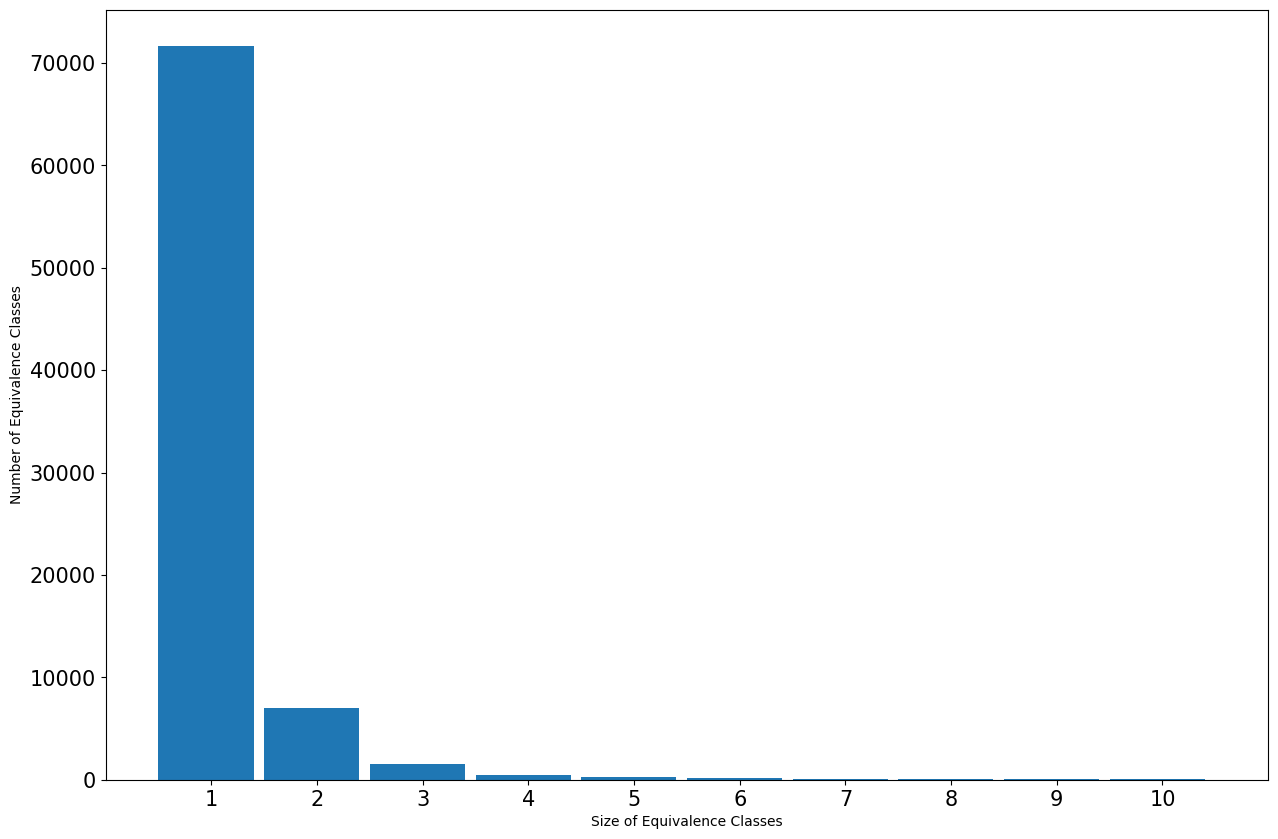

In [45]:
nb = size_equivalence_classes(data_area_generalised)
a = plot_histogram(nb, 10)

Generalise Age

In [46]:
def generalise_age(dataset):
    data = dataset.copy()
    data['age'] = pd.cut(
        data['age'],
        bins=[16, 30, 45, 60, 150],
        labels=["16-29", "30-44", "45-59", "60+"],
        include_lowest=True
    )
    return data

data_age_generalised = generalise_age(data_area_generalised)

Index(['area', 'age', 'gender', 'marital_status', 'qualifications',
       'occupation', 'num_children'],
      dtype='object')


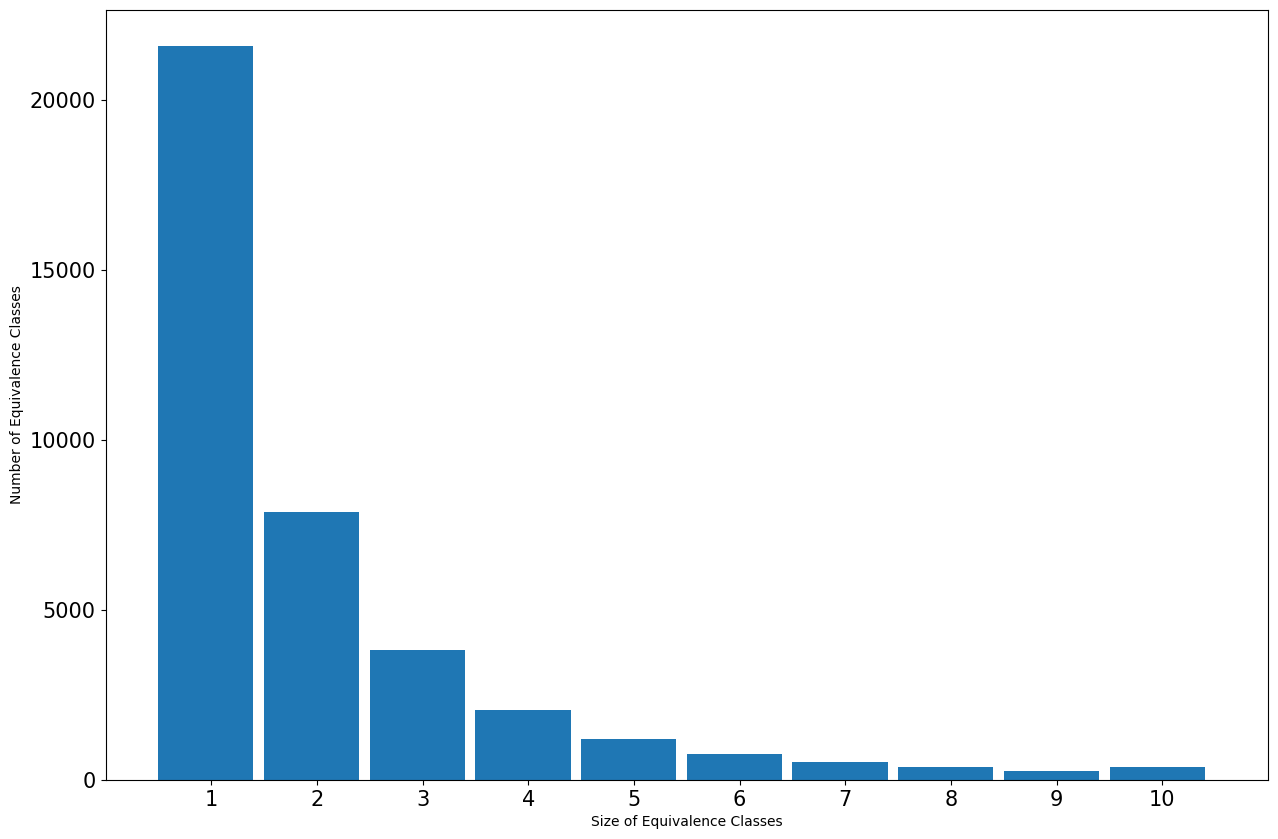

In [47]:
nb = size_equivalence_classes(data_age_generalised)
a = plot_histogram(nb, 10)

Generalise Marital Status

In [48]:
def generalise_marital_status(dataset):
  data = dataset.copy()
  def martial_group(x):
    if x == "divorced" or x == "widowed":
      return "previously_married"
    return x

  data['marital_status'] = data['marital_status'].apply(martial_group)
  return data

data_marital_generalised = generalise_marital_status(data_age_generalised)

Index(['area', 'age', 'gender', 'marital_status', 'qualifications',
       'occupation', 'num_children'],
      dtype='object')


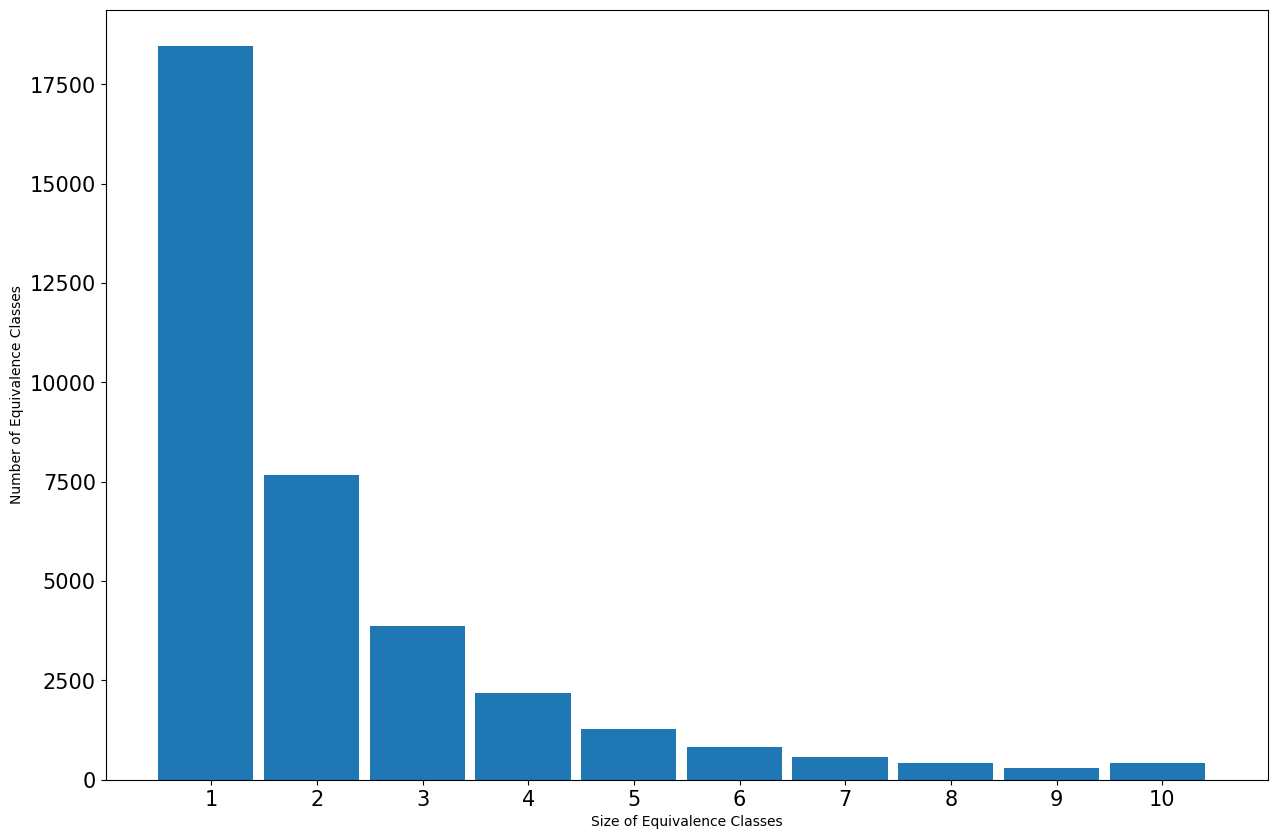

In [49]:
nb = size_equivalence_classes(data_marital_generalised)
a = plot_histogram(nb, 10)

Generalise Number of Children

In [50]:
def generalise_num_children(dataset):
    data = dataset.copy()
    data['num_children'] = pd.cut(
        data['num_children'],
        bins=[0, 1, 4, 10],
        labels=["0", "1-3", "4+"],
        include_lowest=True
    )   
    return data

data_num_children_generalised = generalise_num_children(data_marital_generalised)    

Index(['area', 'age', 'gender', 'marital_status', 'qualifications',
       'occupation', 'num_children'],
      dtype='object')


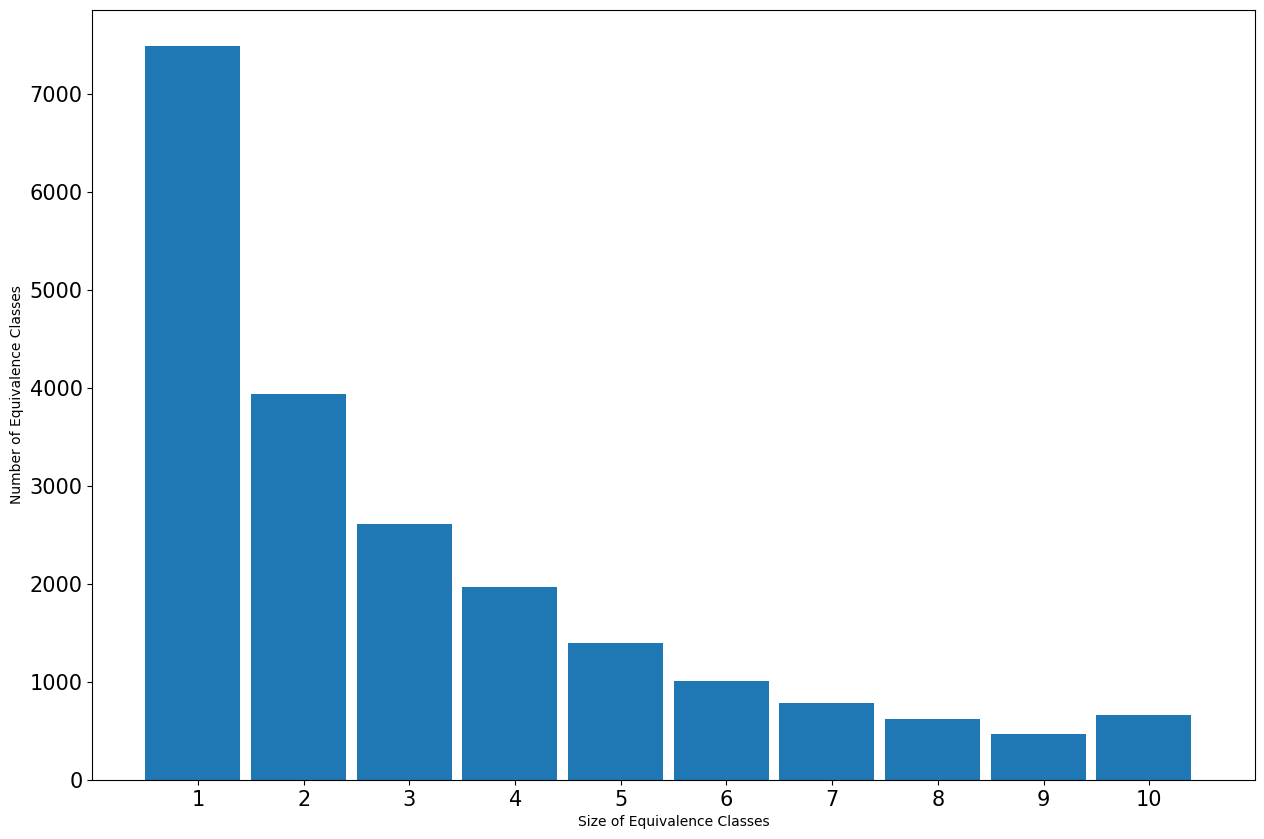

In [51]:
nb = size_equivalence_classes(data_num_children_generalised)
a = plot_histogram(nb, 10)

Generalise Qualifications

In [52]:
def generalise_qualifications(dataset):
    data = dataset.copy()

    def qual_group(x):
        if "1" in x or "2" in x or "3" in x:
            return "Lower Education"
        elif "Apprentice" in x or "BA" in x:
            return "Higher Education"
        return x

    data['qualifications'] = data['qualifications'].apply(qual_group)
    return data

data_fully_generalised = generalise_qualifications(data_num_children_generalised)

Index(['area', 'age', 'gender', 'marital_status', 'qualifications',
       'occupation', 'num_children'],
      dtype='object')
Dropping 12251.0 to achieve 5-anonymity


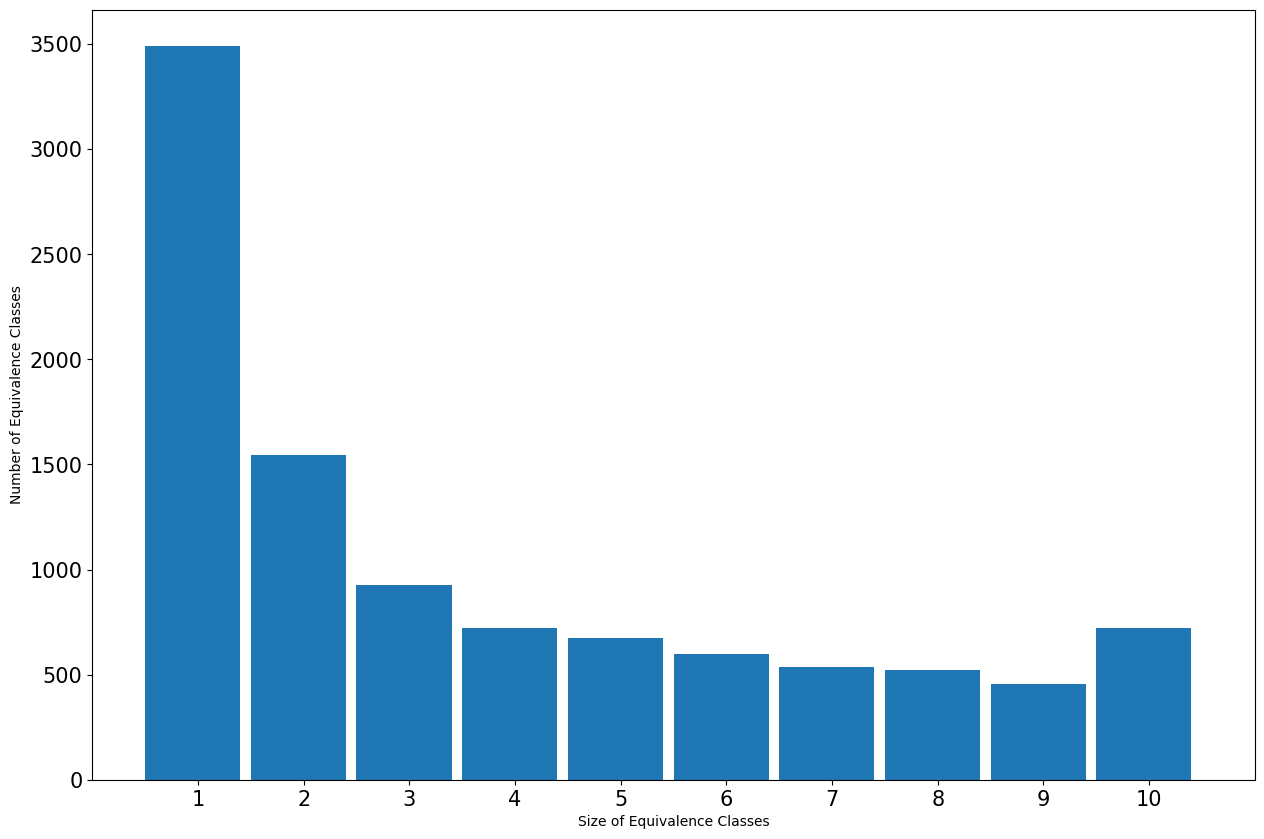

In [53]:
nb = size_equivalence_classes(data_fully_generalised)
a = plot_histogram(nb, 10)

# Calculate Anonymity
k = 5 # 5-anonymity
to_drop = 0
for i in range(k-1):
  to_drop += a[0][i] * (i+1)
print(f"Dropping {to_drop} to achieve {k}-anonymity")

In [54]:
# def postcode_extract(x):
#   postcode = ''
#   for char in x:
#     if char.isdigit():
#       break
#     else:
#       postcode += char
#   return postcode

# def postcode_generalize(dataset):
#   postcode_map = {
# "AB": "Scotland",
# "AL": "East of England",
# "B": "West Midlands",
# "BA": "South West",
# "BB": "North West",
# "BD": "Yorkshire & Humberside",
# "BF": "South West",
# "BH": "South West",
# "BL": "North West",
# "BN": "South East",
# "BR": "Greater London",
# "BS": "South West",
# "BT": "Northern Ireland",
# "CA": "North West",
# "CB": "East of England",
# "CF": "Wales",
# "CH": "North West",
# "CM": "East of England",
# "CO": "East of England",
# "CR": "Greater London",
# "CT": "South East",
# "CV": "West Midlands",
# "CW": "North West",
# "DA": "Greater London",
# "DD": "Scotland",
# "DE": "East Midlands",
# "DG": "Scotland",
# "DH": "North East",
# "DL": "North East",
# "DN": "Yorkshire & Humberside",
# "DT": "South West",
# "DY": "West Midlands",
# "E": "Greater London",
# "EC": "Greater London",
# "EH": "Scotland",
# "EN": "Greater London",
# "EX": "South West",
# "FK": "Scotland",
# "FY": "North West",
# "GL": "South West",
# "GU": "South East",
# "GY": "Channel Islands",
# "HA": "Greater London",
# "HD": "Yorkshire & Humberside",
# "HG": "Yorkshire & Humberside",
# "HP": "East of England",
# "HR": "West Midlands",
# "HS": "Scotland",
# "HU": "Yorkshire & Humberside",
# "HX": "North West",
# "IG": "Greater London",
# "IM": "Isle of Man",
# "IP": "East of England",
# "IV": "Scotland",
# "JE": "Channel Islands",
# "KA": "Scotland",
# "KT": "Greater London",
# "KW": "Scotland",
# "KY": "Scotland",
# "L": "North West",
# "LA": "North West",
# "LD": "Wales",
# "LE": "East Midlands",
# "LL": "Wales",
# "LN": "East Midlands",
# "LS": "Yorkshire & Humberside",
# "LU": "East of England",
# "M": "North West",
# "ME": "South East",
# "MK": "South East",
# "ML": "Scotland",
# "N": "Greater London",
# "NE": "North East",
# "NG": "East Midlands",
# "NN": "West Midlands",
# "NP": "Wales",
# "NR": "East of England",
# "NW": "Greater London",
# "OL": "North West",
# "OX": "South East",
# "PA": "Scotland",
# "PE": "East of England",
# "PH": "Scotland",
# "PL": "South West",
# "PO": "South East",
# "PR": "North West",
# "RG": "South East",
# "RH": "South East",
# "RM": "Greater London",
# "S": "Yorkshire & Humberside",
# "SA": "Wales",
# "SE": "Greater London",
# "SG": "East of England",
# "SK": "North West",
# "SL": "South East",
# "SM": "Greater London",
# "SN": "South West",
# "SO": "South East",
# "SP": "South West",
# "SR": "North East",
# "SS": "East of England",
# "ST": "West Midlands",
# "SW": "Greater London",
# "SY": "Wales",
# "TA": "South West",
# "TD": "Scotland",
# "TF": "West Midlands",
# "TN": "South East",
# "TQ": "South West",
# "TR": "South West",
# "TS": "North East",
# "TW": "Greater London",
# "UB": "Greater London",
# "W": "Greater London",
# "WA": "North West",
# "WC": "Greater London",
# "WD": "Greater London",
# "WF": "Yorkshire & Humberside",
# "WN": "North West",
# "WR": "West Midlands",
# "WS": "West Midlands",
# "WV": "West Midlands",
# "XX": "North East",
# "YO": "Yorkshire & Humberside",
# "ZE"  : "Scotland"
# }
#   dataset['postcode'] = dataset['postcode'].apply(postcode_extract)

#   def get_region(x):
#     if x in postcode_map:
#       if postcode_map[x] == "Scotland":
#         print(x)
#       return postcode_map[x]
#     return x 

#   dataset['postcode'] = dataset['postcode'].map(get_region)
#   return dataset

# def occupation_generalize(dataset):
#   data = dataset.copy()
#   def occupation_group(x):
#     for c in ["1", "2", "3"]:
#       if c in x:
#         return "Top Jobs"
    
#     for c in ["4", "5", "6"]:
#       if c in x:
#         return "Middle Jobs"
    
#     for c in ["7", "8", "9"]:
#       if c in x:
#         return "Lower Jobs"
#     return x
  
#   data['occupation'] = data['occupation'].apply(occupation_group)
#   return data



In [55]:
def to_be_removed(k,dataset):
    result = []
    grouped = dataset.groupby(list(dataset.columns[:-4]))

    for group in grouped:
        equivalence_class = group[1]
        if len(equivalence_class)<k:
            for row_index in equivalence_class.index:
                result.append(row_index)
                
    return result

def remove_rows(k,dataset):
    result = dataset.copy()
    to_remove = to_be_removed(k,dataset)
    
    print(f"Dropping {len(to_remove)} to achieve {k}-anonymity")
    result.drop(to_remove, inplace=True)
    
    return result

In [56]:
k = 5
k_anonymized = remove_rows(k, data_fully_generalised)
print(len(k_anonymized))

Dropping 12251 to achieve 5-anonymity
87749


Index(['area', 'age', 'gender', 'marital_status', 'qualifications',
       'occupation', 'num_children'],
      dtype='object')


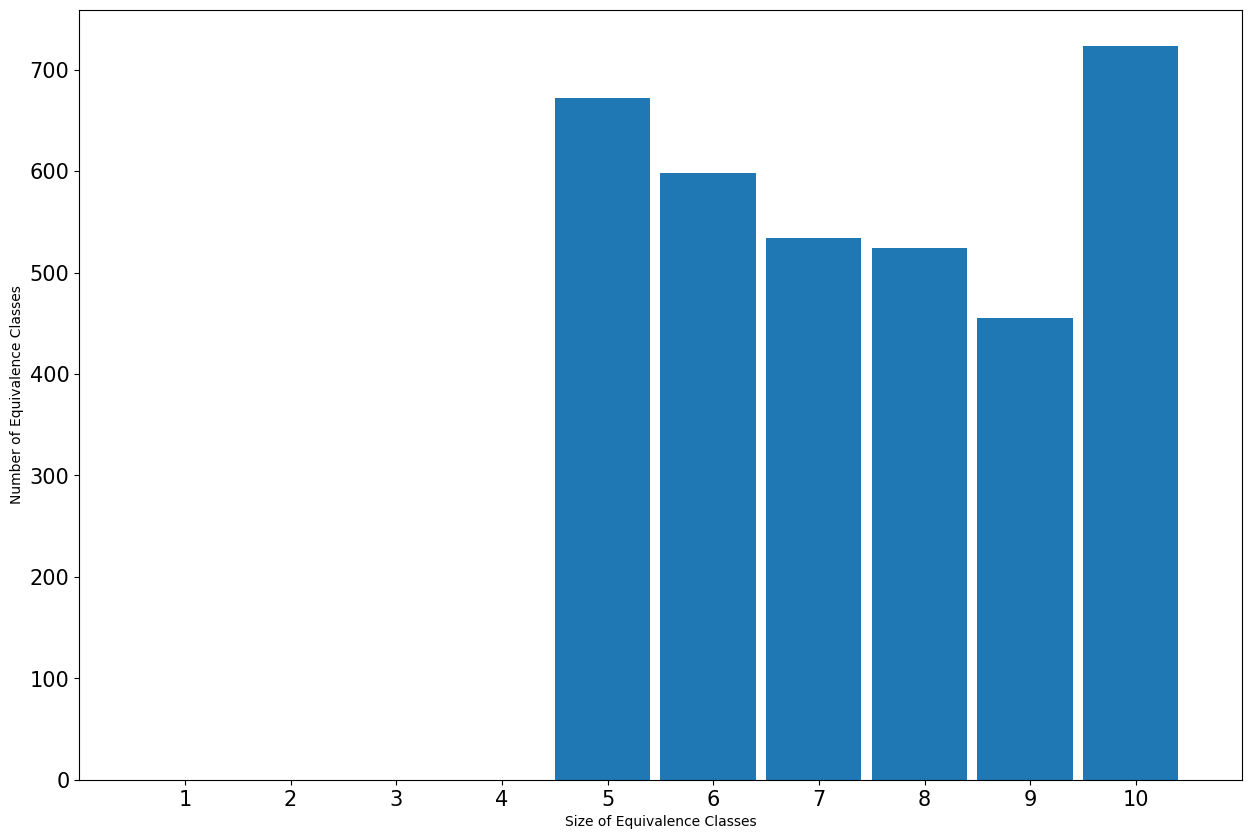

In [57]:
nb = size_equivalence_classes(k_anonymized)
a = plot_histogram(nb, 10)

### L-Diversity

In [58]:
# def check(x, column, threshold):
#     a = x[column].unique()
#     return len(a) < threshold

def check_no_house(x):
    a = x["home_ownership"].unique()
    if len(a) == 1:
        # If we only have 0s, i.e. nobody owns home in this group, we drop
        return a[0] == 0
    return len(a) < 2

def check_benefits(x):
    a = x["on_benefits"].unique()
    if len(a) == 1:
        # If we only have 1s, i.e. everyone is on benefits, we drop 
        return a[0] == 1
    return len(a) < 2

def check_l_diversity(dataset, column):
    if column == "on_benefits":
        rows_to_drop = dataset.groupby(list(dataset.columns[:-4])).filter(check_benefits)
    elif column == "home_ownership":
        rows_to_drop = dataset.groupby(list(dataset.columns[:-4])).filter(check_no_house)
    else:
        raise Exception("Unrecognised Column")
    return rows_to_drop.index

def drop_l_diversity(dataset, column):
    new_dataset = dataset.copy()
    to_drop = check_l_diversity(dataset, column)

    print(f"Dropping {len(to_drop)} for l-diverse column {column}")

    new_dataset.drop(to_drop, inplace=True)
    return new_dataset
    
l_diverse_benefits = drop_l_diversity(k_anonymized, "on_benefits")
l_diverse_homes = drop_l_diversity(l_diverse_benefits, "home_ownership")
print(len(l_diverse_homes))

Dropping 4522 for l-diverse column on_benefits
Dropping 1251 for l-diverse column home_ownership
81976


## t-Closeness

In [59]:
from scipy.stats import wasserstein_distance

# We are trying to compare gender impact on income
# If we use t-closeness to force them close together, we are making their distribution the same
# This makes the utility basically 0 for the use case mentioned since we forced the income distribution
# In each occupation group to be the same...

def check_closeness(x, entire, threshold):
    a = x["income"].value_counts(normalize=True)
    dist = wasserstein_distance(a, entire)
    return dist >= threshold

def check_t_closeness(dataset, threshold):
    entire = dataset["income"].value_counts(normalize=True)
    rows_to_drop = dataset.groupby(list(dataset.columns[:-4])).filter(lambda x: check_closeness(x, entire, threshold))
    return rows_to_drop.index

def drop_t_closeness(dataset, threshold):
    new_dataset = dataset.copy()
    drop_indexes = check_t_closeness(dataset, threshold)
    new_dataset.drop(drop_indexes, inplace=True)
    return new_dataset

t_close_dataset = drop_t_closeness(l_diverse_homes, 0.1)
# t_close_dataset = l_diverse_homes.copy()
print(len(t_close_dataset))

64880


Index(['area', 'age', 'gender', 'marital_status', 'qualifications',
       'occupation', 'num_children'],
      dtype='object')


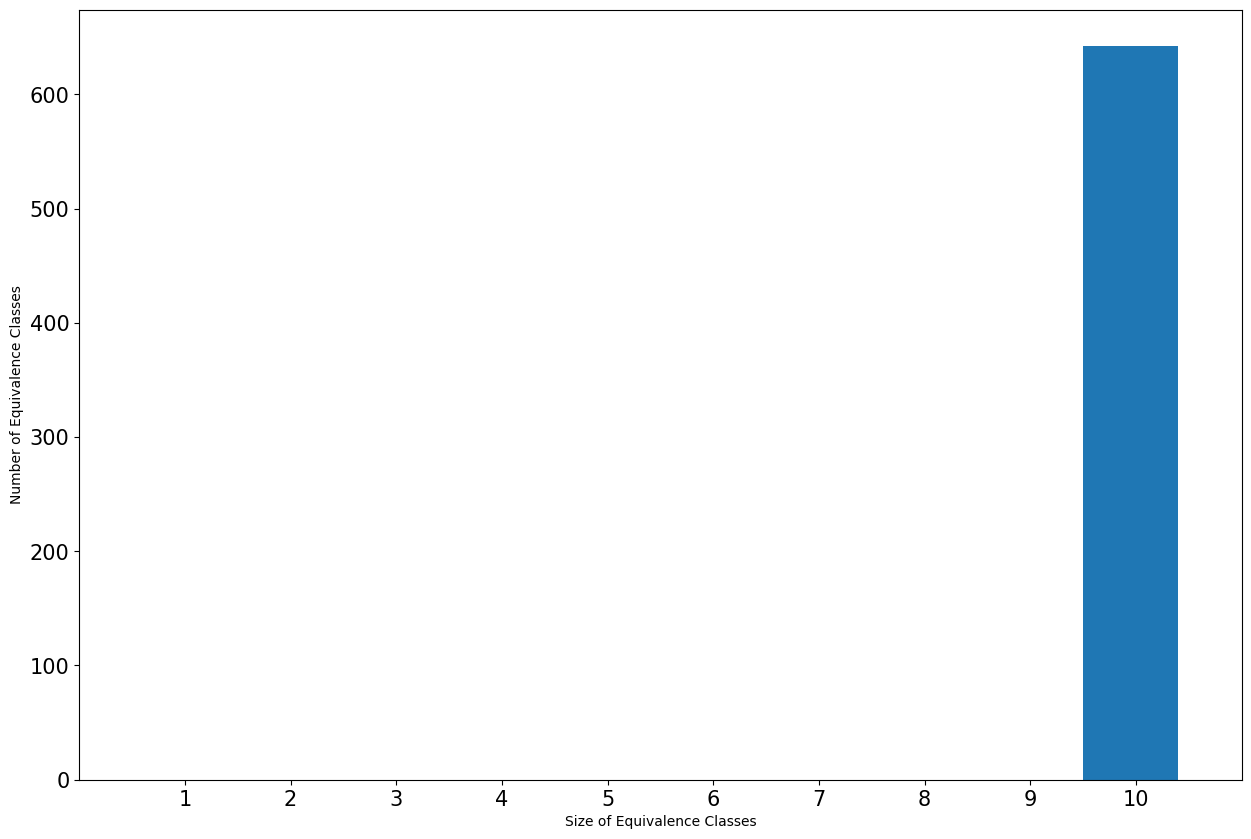

In [60]:
nb = size_equivalence_classes(t_close_dataset)
a = plot_histogram(nb, 10)

## Performance Testing for De-Anonymized Data Utility




In [61]:
''' 
    Function to create an anonymised dataset

    Input:
        dataset : dataset trying to annonymise
        k       : k-annoymity number
        with_t  : t-closeness threshold (default to 0 which means do not use t-closeness)
'''
def anonymise(dataset, k, with_t=0):
    data = dataset.copy()
    data = suppress_columns(data)
    for gen in [generalise_age, generalise_area, generalise_marital_status, generalise_num_children, generalise_qualifications]:
        data = gen(data)
    
    data = remove_rows(k, data)
    data = drop_l_diversity(data, "on_benefits")
    data = drop_l_diversity(data, "home_ownership")
    
    if with_t != 0:
        data = drop_t_closeness(data, with_t)

    return data

Use Case 1: Education and Deprivation

Use Case 2: Gender Impact on Income

In [62]:
from scipy.stats import ttest_ind

female_data = data[data["gender"] == "Female"]
male_data = data[data["gender"] == "Male"]
other_data = data[data["gender"] == "Other"]

for occupation in data["occupation"].unique():
    group_1 = female_data[female_data["occupation"] == occupation]["income"]
    group_2 = male_data[male_data["occupation"] == occupation]["income"]
    score = ttest_ind(group_1, group_2)
    print(occupation, score.pvalue)

print("=================================")
t_close_dataset = anonymise(data, 5)
print("===============ANON==============")
female_data_priv = t_close_dataset[t_close_dataset["gender"] == "Female"]
male_data_priv = t_close_dataset[t_close_dataset["gender"] == "Male"]
other_data_priv = t_close_dataset[t_close_dataset["gender"] == "Other"]

for occupation in t_close_dataset["occupation"].unique():
    group_1 = female_data_priv[female_data_priv["occupation"] == occupation]["income"]
    group_2 = male_data_priv[male_data_priv["occupation"] == occupation]["income"]
    score = ttest_ind(group_1, group_2)
    print(occupation, score.pvalue)

No occupation 0.984850553043518
8. Process, plant and machine operatives 0.9977209932070017
6. Caring, leisure and other service occupations 0.7962930631932503
9. Elementary occupations 0.8333389566282684
2. Professional occupations 0.6978045861958229
5. Skilled trades occupations 0.03926611506961427
1. Managers, directors and senior officials 0.7662154020742936
7. Sales and customer service occupations 0.015142582198630156
3. Associate professional and technical occupations 0.5809025823216422
4. Administrative and secretarial occupations 0.3178006111344203
Dropping 12251 to achieve 5-anonymity
Dropping 4522 for l-diverse column on_benefits
Dropping 1251 for l-diverse column home_ownership
===============ANON==============
6. Caring, leisure and other service occupations 0.27164842872682576
9. Elementary occupations 0.7159053112438943
2. Professional occupations 0.728590112566388
5. Skilled trades occupations 0.03856074972822129
1. Managers, directors and senior officials 0.32386703482

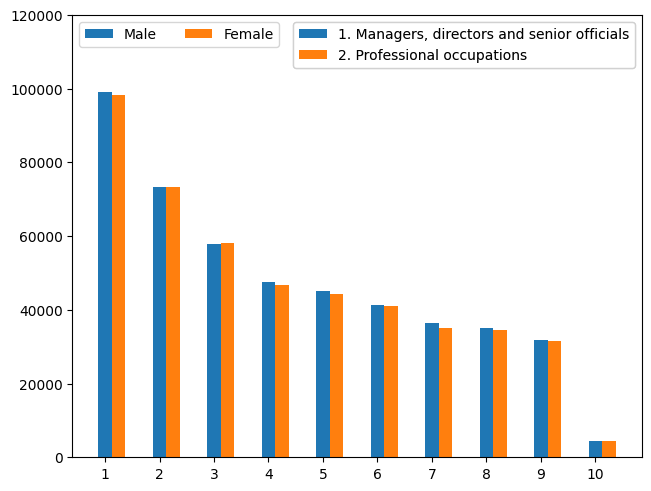

In [63]:
from matplotlib import pyplot 

occupations = t_close_dataset["occupation"].unique()

occupations = sorted(occupations, key=lambda x: x[0])


occupations_mean = {
    "Male": [],
    "Female": [],
    # "Other": []
}

for occupation in occupations:
    female_data = female_data_priv[female_data_priv["occupation"] == occupation]["income"].mean()
    male_data = male_data_priv[male_data_priv["occupation"] == occupation]["income"].mean()
    # other_data = other_data_priv[male_data_priv["occupation"] == occupation]["income"].mean()

    occupations_mean["Male"].append(male_data)
    occupations_mean["Female"].append(female_data)
    # occupations_mean["Other"].append(other_data)

    # bins = np.histogram(np.hstack((group_1, group_2)), bins=10)[1]
    # plt.hist(group_1, bins, edgecolor='black')
    # plt.hist(group_2, bins, edgecolor='black')
    # break

x = np.arange(len(occupations))
fig, ax = plt.subplots(layout='constrained')
width = 0.25
multiplier = 1

bars = []
for attribute, means in occupations_mean.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, means, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    bars.append(rects)

ax.set_xticks(x + width, [i+1 for i in range(len(occupations))])
ax.set_ylim(0, 1.2e5)
# ax.legend(loc='upper left', ncols=2)
legend1 = pyplot.legend(loc='upper left', ncols=2)
legend2 = pyplot.legend(occupations, loc='upper right')
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.show()


In [64]:
#Fitting SVM Model
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:

#train test split to ensure it is the same ids in each set
from sklearn.metrics import accuracy_score, roc_auc_score


def classification_eval(df1, df2, x_col1, x_col2, y_col):
    # Split data into training and testing sets for both datasets
    train_df1, test_df1 = train_test_split(df1, test_size=0.2, random_state=42)
    train_df2, test_df2 = train_test_split(df2, test_size=0.2, random_state=42)

    # Create SVM models
    svm_model1 = SVC(kernel='linear', C=1)
    svm_model2 = SVC(kernel='linear', C=1)

    # Train Model 1
    X_train1 = train_df1[x_col1]
    y_train1 = train_df1[y_col]
    X_test1 = test_df1[x_col1]
    y_test1 = test_df1[y_col]
    svm_model1.fit(X_train1, y_train1)
    pred1 = svm_model1.predict(X_test1)

    # Train Model 2
    X_train2 = train_df2[x_col2]
    y_train2 = train_df2[y_col]
    X_test2 = test_df2[x_col2]
    y_test2 = test_df2[y_col]
    svm_model2.fit(X_train2, y_train2)
    pred2 = svm_model2.predict(X_test2)

    # Evaluate accuracy for both models
    accuracy1 = accuracy_score(y_test1, pred1)
    accuracy2 = accuracy_score(y_test2, pred2)

    # Evaluate AUC-ROC for both models
    auc1 = roc_auc_score(y_test1, svm_model1.decision_function(X_test1))
    auc2 = roc_auc_score(y_test2, svm_model2.decision_function(X_test2))

    print(f"Accuracy Model 1: {accuracy1}")
    print(f"AUC-ROC Model 1: {auc1}")
    print(f"Accuracy Model 2: {accuracy2}")
    print(f"AUC-ROC Model 2: {auc2}")

    return accuracy1, auc1, accuracy2, auc2

In [66]:

def regression_eval(df1, df2, y_col, x_cols,  categorical_cols):
    # Use a common test set for both models
    train_df1, test_df1 = train_test_split(df1, test_size=0.2, random_state=42)
    train_df2, test_df2 = train_test_split(df2, test_size=0.2, random_state=42)
    svm_model1 = SVR(kernel='linear', C=1)  # Linear kernel, adjust C parameter as needed
    svm_model2 = SVR(kernel='linear', C=1)  # Linear kernel, adjust C parameter as needed
    
    encoder = OneHotEncoder(drop='first', sparse=False)

    # Fit and transform the encoder on the combined dataset
    X_train1_encoded = encoder.fit_transform(train_df1[categorical_cols])
    X_test1_encoded = encoder.transform(test_df1[categorical_cols])

    X_train2_encoded = encoder.fit_transform(train_df2[categorical_cols])
    X_test2_encoded = encoder.transform(test_df2[categorical_cols])

    # Concatenate the one-hot encoded features with the original features
    X_train1 = pd.concat([train_df1[x_cols].reset_index(drop=True), pd.DataFrame(X_train1_encoded)], axis=1)
    X_test1 = pd.concat([test_df1[x_cols].reset_index(drop=True), pd.DataFrame(X_test1_encoded)], axis=1)

    X_train2 = pd.concat([train_df2[x_cols].reset_index(drop=True), pd.DataFrame(X_train2_encoded)], axis=1)
    X_test2 = pd.concat([test_df2[x_cols].reset_index(drop=True), pd.DataFrame(X_test2_encoded)], axis=1)
    y_train1 = train_df1[y_col]  # Use the y_col from the training set
    y_train2 = train_df2[y_col]  # Use the y_col from the training set
    
    svm_model1.fit(X_train1, y_train1)
    svm_model2.fit(X_train2, y_train2)

    pred1 = svm_model1.predict(X_test1)
    pred2 = svm_model2.predict(X_test2)

    # Evaluate the models
    mae1 = mean_absolute_error(y_test1, pred1)
    mse1 = mean_squared_error(y_test1, pred1)
    r2_1 = r2_score(y_test1, pred1)

    mae2 = mean_absolute_error(y_test2, pred2)
    mse2 = mean_squared_error(y_test2, pred2)
    r2_2 = r2_score(y_test2, pred2)

    print("Metrics for Model 1:")
    print(f"MAE: {mae1}")
    print(f"MSE: {mse1}")
    print(f"R-squared: {r2_1}")

    print("\nMetrics for Model 2:")
    print(f"MAE: {mae2}")
    print(f"MSE: {mse2}")
    print(f"R-squared: {r2_2}")

    return mae1, mse1, r2_1, mae2, mse2, r2_2


Deprivation Definition: Economic deprivation is a condition in which individuals or households struggle to meet their basic needs. 
On Benefits UK GOV definition: The benefits system provides practical help and financial support if you are unemployed and looking for work. 

In [67]:
#To find locations where poor access to education leads to deprivation and more investment in high-quality primary education is needed
def correlation(x,y, name1, name2, title):
    correlation_coefficient = np.corrcoef(x, y)[0, 1]

    # Create a scatter plot
    plt.scatter(x, y, label=f'Correlation: {correlation_coefficient:.2f}')

    # Add labels and title
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.title(title)

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()


def bar_graph(bins, number_per_class, bin_name, metric, title):
    # Check if the lengths of bins and number_per_class are the same
    if len(bins) != len(number_per_class):
        raise ValueError("Lengths of bins and number_per_class must be the same.")

    # Create a bar graph
    plt.bar(bins, number_per_class, align='center', alpha=0.7)

    # Add labels and title
    plt.xlabel(bin_name)
    plt.ylabel(metric)
    plt.title(title)

    # Display the plot
    plt.show()

def entropy(df):
    num_row = df.shape[0]
    prob = 1/ num_row
    v1 = prob*np.ones((num_row,))
    v2 = np.log(prob*np.ones((num_row,)))
    entropy_val = -1*np.dot(v1, v2)
    return entropy_val

def info_loss(df1, df2):
    en1 =  entropy(df1)
    en2 =  entropy(df2)
    return en1/en2

In [68]:
data.columns

Index(['area', 'postcode', 'age', 'dob', 'gender', 'marital_status',
       'qualifications', 'occupation', 'num_children', 'income', 'on_benefits',
       'home_ownership', 'credit_score'],
      dtype='object')

In [69]:

def regression_eval(df1, df2, y_col, x_cols,  categorical_cols):
    # Use a common test set for both models
    df11X_train2_encoded = pd.get_dummies(data[categorical_cols], prefix='', prefix_sep='')

    train_df1, test_df1 = train_test_split(df1, test_size=0.2, random_state=42)
    train_df2, test_df2 = train_test_split(df2, test_size=0.2, random_state=42)
    svm_model1 = SVR(kernel='linear', C=1)  # Linear kernel, adjust C parameter as needed
    svm_model2 = SVR(kernel='linear', C=1)  # Linear kernel, adjust C parameter as needed
    
    encoder = OneHotEncoder(drop='first', sparse=False)

    # Fit and transform the encoder on the combined dataset

    X_train2_encoded = pd.get_dummies(data[categorical_cols], prefix='', prefix_sep='')

    # Get the column names of the one-hot encoded DataFrame
    encoded_column_names = encoded_data.columns.tolist()

    X_train2_encoded = encoder.fit_transform(train_df2[categorical_cols])
    X_test2_encoded = encoder.transform(test_df2[categorical_cols])

    # Concatenate the one-hot encoded features with the original features
    X_train1 = pd.concat([train_df1[x_cols].reset_index(drop=True), pd.DataFrame(X_train1_encoded)], axis=1)
    X_test1 = pd.concat([test_df1[x_cols].reset_index(drop=True), pd.DataFrame(X_test1_encoded)], axis=1)

    X_train2 = pd.concat([train_df2[x_cols].reset_index(drop=True), pd.DataFrame(X_train2_encoded)], axis=1)
    X_test2 = pd.concat([test_df2[x_cols].reset_index(drop=True), pd.DataFrame(X_test2_encoded)], axis=1)
    y_train1 = train_df1[y_col]  # Use the y_col from the training set
    y_train2 = train_df2[y_col]  # Use the y_col from the training set
    
   
    svm_model1.fit(X_train1, y_train1)
    svm_model2.fit(X_train2, y_train2)

    pred1 = svm_model1.predict(X_test1)
    pred2 = svm_model2.predict(X_test2)

    # Evaluate the models
    mae1 = mean_absolute_error(y_test1, pred1)
    mse1 = mean_squared_error(y_test1, pred1)
    r2_1 = r2_score(y_test1, pred1)

    mae2 = mean_absolute_error(y_test2, pred2)
    mse2 = mean_squared_error(y_test2, pred2)
    r2_2 = r2_score(y_test2, pred2)

    print("Metrics for Model 1:")
    print(f"MAE: {mae1}")
    print(f"MSE: {mse1}")
    print(f"R-squared: {r2_1}")

    print("\nMetrics for Model 2:")
    print(f"MAE: {mae2}")
    print(f"MSE: {mse2}")
    print(f"R-squared: {r2_2}")

    return mae1, mse1, r2_1, mae2, mse2, r2_2


In [70]:
print('k=2')
kanon2 = anonymise(data, 2, with_t=0)
print('k=3')
kanon3 = anonymise(data, 3, with_t=0)
print('k=4')
kanon4 = anonymise(data, 4, with_t=0)
print('k=5')
kanon5 = anonymise(data, 5, with_t=0)
print('k=7')
kanon7 = anonymise(data, 7, with_t=0)
print('k=10')
kanon10 = anonymise(data, 10, with_t=0)

k=2


Dropping 3489 to achieve 2-anonymity
Dropping 5397 for l-diverse column on_benefits
Dropping 1693 for l-diverse column home_ownership
k=3
Dropping 6577 to achieve 3-anonymity
Dropping 5031 for l-diverse column on_benefits
Dropping 1435 for l-diverse column home_ownership
k=4
Dropping 9355 to achieve 4-anonymity
Dropping 4746 for l-diverse column on_benefits
Dropping 1327 for l-diverse column home_ownership
k=5
Dropping 12251 to achieve 5-anonymity
Dropping 4522 for l-diverse column on_benefits
Dropping 1251 for l-diverse column home_ownership
k=7
Dropping 19199 to achieve 7-anonymity
Dropping 3997 for l-diverse column on_benefits
Dropping 1107 for l-diverse column home_ownership
k=10
Dropping 31224 to achieve 10-anonymity
Dropping 3003 for l-diverse column on_benefits
Dropping 841 for l-diverse column home_ownership


In [71]:
y_col = ['income']
x_cols = ['age', 'marital_status','qualifications','num_children']
categorical_cols =  ['occupation','qualifications']



In [72]:

encoded_data = pd.get_dummies(data[categorical_cols], prefix='', prefix_sep='')

# Get the column names of the one-hot encoded DataFrame
encoded_column_names = encoded_data.columns.tolist()

print(encoded_data[encoded_column_names])


                                                    1. Managers, directors and senior officials  \
pname                                                                                             
3c74a97ca3c31e1638c98d00db4a263fd18fb58a2a5de05...                                            0   
150db586bb6a999b3046a8c3cb14160757db6f0395b7556...                                            0   
08ed1e74a9d71f48f5c882b1ef37dd86a2ba9842be5399e...                                            0   
7cf76f089dd98978e58522a7e4da1ddd93675923ceff9de...                                            0   
55e84f01932f4cbf5dae2d63597c48ad10c94ad82aeed5a...                                            0   
...                                                                                         ...   
9795ceb46d52d4e4c53ad502cba186687e3f4f958d5b489...                                            0   
41a4b2ea7f2a24da9df73d6db24f0b47e4417e018cb18b0...                                            0   
ab661de189

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR

df1 = data.copy()
df1 = suppress_columns(df1)
df2 = kanon5
y_col = ['on_benefits']
categorical_cols =  ['area', 'qualifications']

df11 = pd.get_dummies(df1 [categorical_cols], prefix='', prefix_sep='', dtype=int)
encoded_column_names1 = df11.columns.tolist()
final_data1 = pd.concat([df1.drop(columns=categorical_cols),df11], axis=1)

categorical_cols_for_priv = ["area", "qualifications"]

df21 = pd.get_dummies(df2 [categorical_cols_for_priv], prefix='', prefix_sep='', dtype=int)
encoded_column_names2 = df21.columns.tolist()
final_data2 = pd.concat([df2.drop(columns=categorical_cols_for_priv),df21], axis=1)

all_cols1 = y_col + encoded_column_names1
all_cols2 = y_col + encoded_column_names2
train_df1, test_df1 = train_test_split(final_data1 [all_cols1], test_size=0.4, random_state=42)
train_df2, test_df2 = train_test_split(final_data2 [all_cols2], test_size=0.4, random_state=42)
svm_model1 = SVR(kernel='linear', C=1)  # Linear kernel, adjust C parameter as needed
svm_model2 = SVR(kernel='linear', C=1)  # Linear kernel, adjust C parameter as needed

encoder = OneHotEncoder(drop='first', sparse=False)

# Concatenate the one-hot encoded features with the original features
# X_train1 = pd.concat([train_df1[all_cols1].reset_index(drop=True), pd.DataFrame(X_train1_encoded)], axis=1)
# X_test1 = pd.concat([test_df1[all_cols1].reset_index(drop=True), pd.DataFrame(X_test1_encoded)], axis=1)

# X_train2 = pd.concat([train_df2[all_cols2].reset_index(drop=True), pd.DataFrame(X_train2_encoded)], axis=1)
# X_test2 = pd.concat([test_df2[all_cols2].reset_index(drop=True), pd.DataFrame(X_test2_encoded)], axis=1)
y_train1 = train_df1[y_col]  # Use the y_col from the training set
y_train2 = train_df2[y_col]  # Use the y_col from the training set

y_test1 = test_df1[y_col]
y_test2 = test_df2[y_col]

svm_model1.fit(train_df1, y_train1)
svm_model2.fit(train_df2, y_train2)

pred1 = svm_model1.predict(test_df1)
pred2 = svm_model2.predict(test_df2)

# Evaluate the models
mae1 = mean_absolute_error(y_test1, pred1)
mse1 = mean_squared_error(y_test1, pred1)
r2_1 = r2_score(y_test1, pred1)

mae2 = mean_absolute_error(y_test2, pred2)
mse2 = mean_squared_error(y_test2, pred2)
r2_2 = r2_score(y_test2, pred2)

print("Metrics for Model 1:")
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"R-squared: {r2_1}")

print("\nMetrics for Model 2:")
print(f"MAE: {mae2}")
print(f"MSE: {mse2}")
print(f"R-squared: {r2_2}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metrics for Model 1:
MAE: 0.09999999999999992
MSE: 0.009999999999999986
R-squared: 0.9386575490621428

Metrics for Model 2:
MAE: 0.0999999999999999
MSE: 0.009999999999999985
R-squared: 0.9245484027771025


In [ ]:
classification_eval(final_data1, final_data2, encoded_column_names1, encoded_column_names2, ["on_benefits"])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming 'df1' and 'df2' are your DataFrames
y_col = 'income'
x_cols = ['gender']

# Check column names of the DataFrames
print("Columns of df1:", df1.columns)
print("Columns of df2:", df2.columns)

# Convert 'gender' to one-hot encoding
df1_encoded = pd.get_dummies(df1, columns=['gender'], drop_first=True)
df2_encoded = pd.get_dummies(df2, columns=['gender'], drop_first=True)

# Check column names after one-hot encoding
print("Columns of df1_encoded:", df1_encoded.columns)
print(df1_encoded)
print("Columns of df2_encoded:", df2_encoded.columns)

# Split the data into training and testing sets for both datasets
train_df1, test_df1 = train_test_split(df1_encoded, test_size=0.2, random_state=42)
train_df2, test_df2 = train_test_split(df2_encoded, test_size=0.2, random_state=42)

newcols= ["gender_Male" ,"gender_Other"]
f = ['income']

    # Create a linear regression model
lin_reg_model = LinearRegression()

    # Fit the model

lin_reg_model.fit(train_df1[newcols], train_df1['income'])

# Make predictions
y_pred = lin_reg_model.predict(test_df1[newcols])
y_test = test_df1[newcols]
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

# XGBoost Regression
    # Create an XGBoost regression model
xgb_model = xgb.XGBRegressor()

    # Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression Metrics:")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

# Linear Regression Evaluation for Dataset 1
linear_regression_eval(train_df1[x_cols], test_df1[x_cols], train_df1[y_col], test_df1[y_col])

# Linear Regression Evaluation for Dataset 2
linear_regression_eval(train_df2[x_cols], test_df2[x_cols], train_df2[y_col], test_df2[y_col])

# XGBoost Regression Evaluation for Dataset 1
#xgboost_regression_eval(train_df1[x_cols], test_df1[x_cols], train_df1[y_col], test_df1[y_col])

# XGBoost Regression Evaluation for Dataset 2
#xgboost_regression_eval(train_df2[x_cols], test_df2[x_cols], train_df2[y_col], test_df2[y_col])


In [80]:
    new_data = anonymise(data, k, with_t=0)
    anon_loc_data = generalise_area(data)
    anon_qualification_data = generalise_qualifications(anon_loc_data)
    anon_qualification_data.columns

Dropping 12251 to achieve 5-anonymity
Dropping 4522 for l-diverse column on_benefits
Dropping 1251 for l-diverse column home_ownership


Index(['area', 'postcode', 'age', 'dob', 'gender', 'marital_status',
       'qualifications', 'occupation', 'num_children', 'income', 'on_benefits',
       'home_ownership', 'credit_score'],
      dtype='object')

In [86]:
def get_percentage(dataset, k):
    k_data = anonymise(data, k, with_t=0)

    anon_loc_data = generalise_area(data)
    anon_qualification_data = generalise_qualifications(anon_loc_data)

    # Filter data for people on benefits and poorly educated
    on_benefits_poorly_educated = anon_qualification_data[
        (anon_qualification_data['on_benefits'] == 1) & (anon_qualification_data['qualifications'] == 'Lower Education')
    ]

    on_benefits = anon_qualification_data[
        (anon_qualification_data['on_benefits'] == 1)
    ]

    on_benefits_poorly_educated_k_data = k_data[
        (anon_qualification_data['on_benefits'] == 1) & (anon_qualification_data['qualifications'] == 'Lower Education')
    ]

    on_benefits_k_data = k_data[
        (anon_qualification_data['on_benefits'] == 1)
    ]

    # Group by location and calculate the percentage
    location_percentage_orig= on_benefits_poorly_educated.groupby('area').size() / on_benefits.groupby('area').size()
    location_percentage_orig_sorted = location_percentage_orig.sort_values(ascending=False)

    print("Original")
    print(location_percentage_orig_sorted)
    location_percentage_k_data = on_benefits_poorly_educated_k_data.groupby('area').size() / on_benefits_k_data.groupby('area').size()
    location_percentage_k_data_sorted = location_percentage_k_data.sort_values(ascending=False)

    print("k_data")
    print(location_percentage_k_data_sorted)

    return location_percentage_orig, location_percentage_k_data

get_percentage(data, 5)

Dropping 12251 to achieve 5-anonymity
Dropping 4522 for l-diverse column on_benefits
Dropping 1251 for l-diverse column home_ownership
Original
area
East Midlands               0.809191
West Midlands               0.808411
North East                  0.804627
Yorkshire and the Humber    0.801070
Wales                       0.798287
North West                  0.794777
South West                  0.785903
East of England             0.767637
South East                  0.743353
London                      0.683931
dtype: float64
k_data
area
Wales                       0.967016
East Midlands               0.946226
North East                  0.944444
East of England             0.937759
West Midlands               0.919585
North West                  0.908207
Yorkshire and the Humber    0.881561
South West                  0.874859
South East                  0.791244
London                      0.723788
dtype: float64


/var/folders/0n/wq7_jdtd6kl3c3r69jkvyf140000gn/T/ipykernel_49885/1570188355.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  on_benefits_poorly_educated_k_data = k_data[
/var/folders/0n/wq7_jdtd6kl3c3r69jkvyf140000gn/T/ipykernel_49885/1570188355.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  on_benefits_k_data = k_data[


(area
 East Midlands               0.809191
 East of England             0.767637
 London                      0.683931
 North East                  0.804627
 North West                  0.794777
 South East                  0.743353
 South West                  0.785903
 Wales                       0.798287
 West Midlands               0.808411
 Yorkshire and the Humber    0.801070
 dtype: float64,
 area
 East Midlands               0.946226
 East of England             0.937759
 London                      0.723788
 North East                  0.944444
 North West                  0.908207
 South East                  0.791244
 South West                  0.874859
 Wales                       0.967016
 West Midlands               0.919585
 Yorkshire and the Humber    0.881561
 dtype: float64)